
# Project Title: Titanic Survival Prediction Using Machine Learning

# *The dataset used for this project contains information about passengers aboard the Titanic, including features such as age, gender, ticket class, number of siblings or spouses aboard, number of parents or children aboard, fare, and whether they survived or not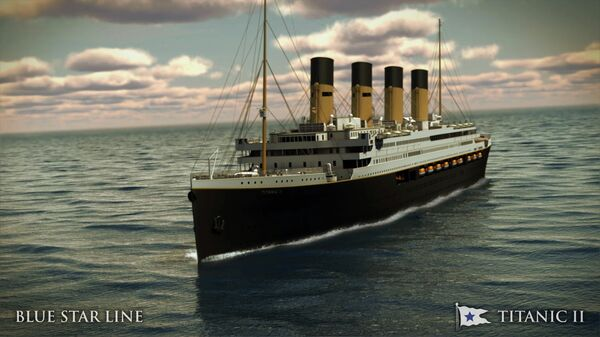*

In [ ]:
import pandas as pd
import numpy as pn
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [2]:
#data reading
train=pd.read_csv(r'train.csv')
test=pd.read_csv(r'test.csv')

In [3]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# EXPLORE DATA

In [4]:
print("Train columns:", train.columns, "\n")
print("Test columns:", test.columns, "\n")

Train columns: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object') 

Test columns: Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object') 



In [5]:
#train.head(5)
#train.tail(5)
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
521,522,0,3,"Vovk, Mr. Janko",male,22.0,0,0,349252,7.8958,NaN,S
127,128,1,3,"Madsen, Mr. Fridtjof Arne",male,24.0,0,0,C 17369,7.1417,NaN,S
76,77,0,3,"Staneff, Mr. Ivan",male,NaN,0,0,349208,7.8958,NaN,S


In [6]:
test.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
137,1029,2,"Schmidt, Mr. August",male,26.0,0,0,248659,13.0000,NaN,S
364,1256,1,"Harder, Mrs. George Achilles (Dorothy Annan)",female,25.0,1,0,11765,55.4417,E50,C
285,1177,3,"Dennis, Mr. William",male,36.0,0,0,A/5 21175,7.2500,NaN,S
101,993,2,"Weisz, Mr. Leopold",male,27.0,1,0,228414,26.0000,NaN,S
76,968,3,"Miles, Mr. Frank",male,NaN,0,0,359306,8.0500,NaN,S


In [7]:
train.size ,test.size

(10692, 4598)

In [8]:
train.shape,test.shape

((891, 12), (418, 11))

In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train.duplicated().sum(),test.duplicated().sum()

(0, 0)

<Axes: >

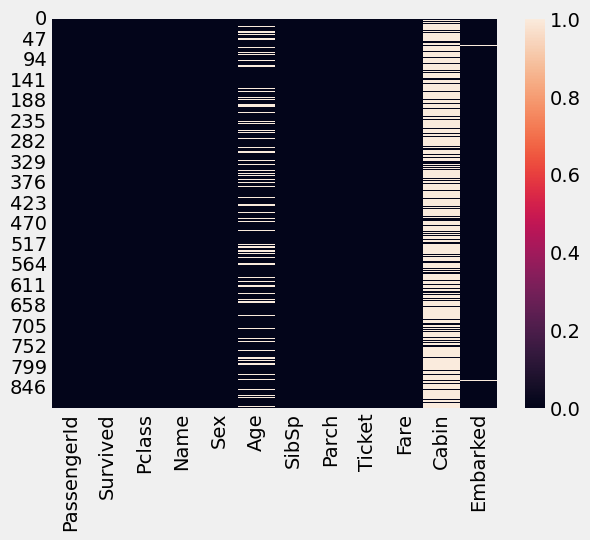

In [11]:
train.isnull().sum()
sns.heatmap(train.isnull())

# process data

<Axes: >

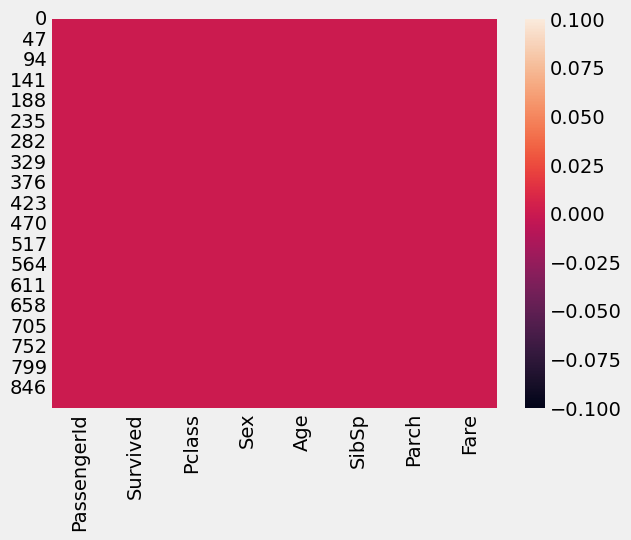

In [12]:
#data clean null
def clean (c):
    
    
    
    c.isnull().sum()
    c.Age.median()
    c['Age']=train.Age.fillna(train.Age.median())
    c=c.drop(['Name','Cabin','Ticket','Embarked'],axis=1,inplace=True)
    return(c)
    

clean(train)
clean(test)

test.Fare=test.Fare.fillna(0)


train.isnull().sum()
sns.heatmap(train.isnull())

In [13]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [14]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [15]:
#change obgect to numric
#pd.get_dummies(train.sex)
from sklearn.preprocessing import LabelEncoder 
la=LabelEncoder()
train1=train.select_dtypes(include='object')
train2=train.select_dtypes(exclude='object')
for i in range (0,train1.shape[1]):
    train1.iloc[:,i]=la.fit_transform(train1.iloc[:,i])
    train=pd.concat([train1,train2],axis=1)
    
train

,Sex,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,1,0,3,22.0,1,0,7.2500
1,0,2,1,1,38.0,1,0,71.2833
2,0,3,1,3,26.0,0,0,7.9250
3,0,4,1,1,35.0,1,0,53.1000
4,1,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,1,887,0,2,27.0,0,0,13.0000
887,0,888,1,1,19.0,0,0,30.0000
888,0,889,0,3,28.0,1,2,23.4500
889,1,890,1,1,26.0,0,0,30.0000


In [16]:
from sklearn.preprocessing import LabelEncoder 
la=LabelEncoder()
test1=test.select_dtypes(include='object')
test2=test.select_dtypes(exclude='object')
for i in range (0,test1.shape[1]):
    test1.iloc[:,i]=la.fit_transform(test1.iloc[:,i])
    test=pd.concat([test1,test2],axis=1)
    
test

,Sex,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,892,3,22.0,0,0,7.8292
1,0,893,3,38.0,1,0,7.0000
2,1,894,2,26.0,0,0,9.6875
3,1,895,3,35.0,0,0,8.6625
4,0,896,3,35.0,1,1,12.2875
...,...,...,...,...,...,...,...
413,1,1305,3,28.0,0,0,8.0500
414,0,1306,1,44.0,0,0,108.9000
415,1,1307,3,28.0,0,0,7.2500
416,1,1308,3,34.0,0,0,8.0500


# DATA ANALYSIS

<Axes: >

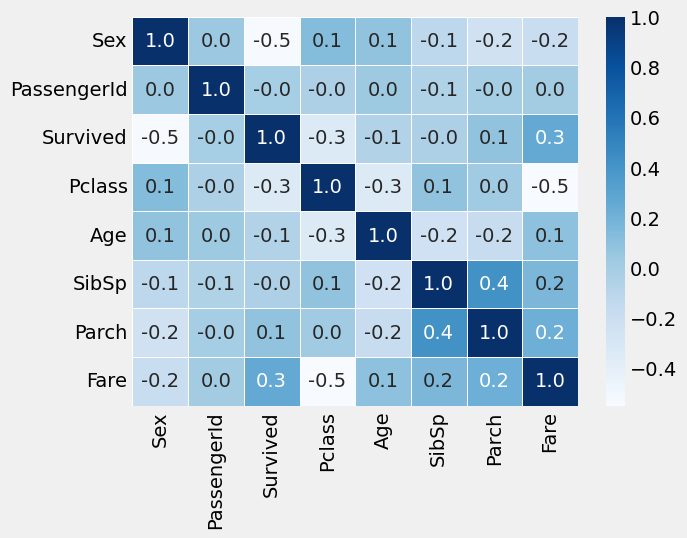

In [17]:
cor=train.corr()
sns.heatmap(cor,annot=True,linewidth=.5,fmt='.1f',cmap='Blues')

<function matplotlib.pyplot.show(close=None, block=None)>

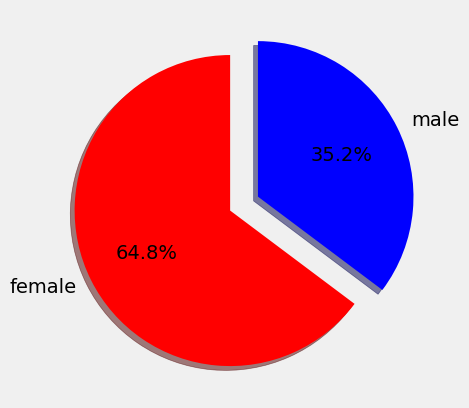

In [18]:
fig, ax = plt.subplots()
labels=['female','male']
color=('r','b')
explode=[.1,.1]
ax.pie(train.Sex.value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',colors=color
       ,shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9}, startangle=90)



plt.show

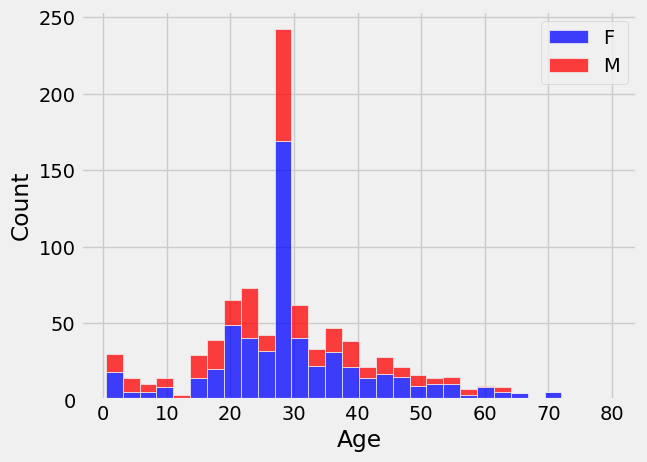

In [19]:

sns.histplot(data=train,x='Age' , hue="Sex",multiple="stack",palette=['r','b'])
plt.legend('FM')


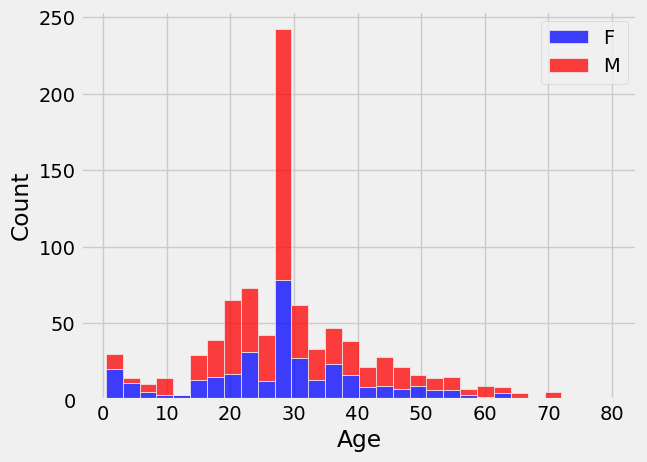

In [20]:
sns.histplot(data=train,x='Age' , hue="Survived",multiple="stack",palette=['r','b'])
plt.legend('FM')

<Axes: xlabel='Sex', ylabel='Density'>

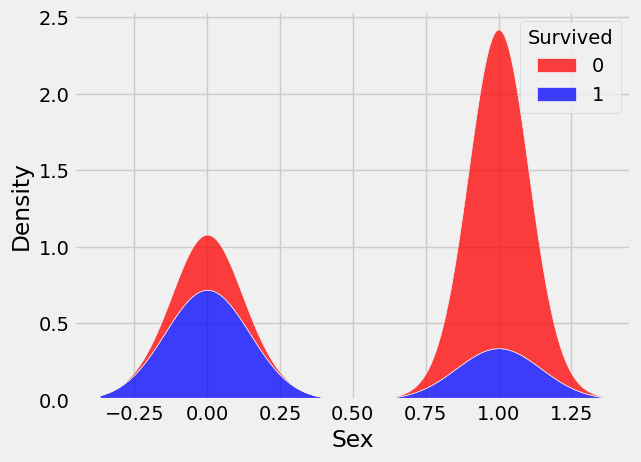

In [21]:

sns.kdeplot(data=train,x='Sex' , hue="Survived",multiple="stack",palette=['r','b'])


<Axes: xlabel='Pclass', ylabel='count'>

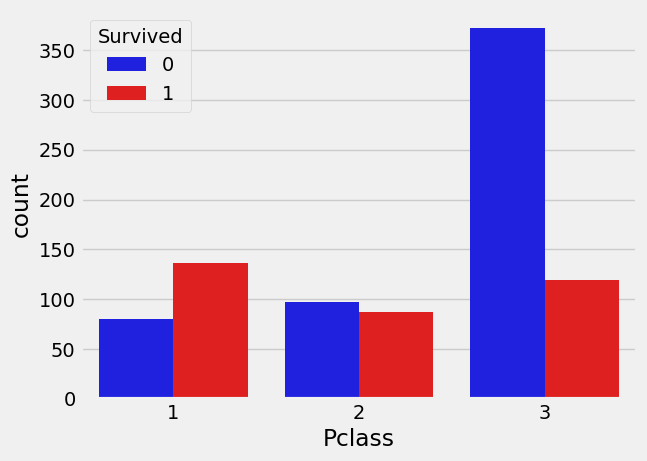

In [22]:
sns.countplot(data=train,x='Pclass' , hue="Survived",palette=['b','r'])


# create model

In [23]:
train.to_csv("t.csv")

In [24]:
x=train.drop(['Survived'],axis=1)
y=train.Survived
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=2)


In [25]:
print(x.shape, x_train.shape, x_test.shape)

(891, 7) (712, 7) (179, 7)


In [26]:
Algrothims=[GradientBoostingClassifier(),LogisticRegression(),RandomForestClassifier()]

In [27]:
accuracyy=[]

In [28]:
model1=GradientBoostingClassifier()
model2=LogisticRegression()
model3=RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)

In [29]:
def all(model):
    model.fit(x_train,y_train)
    pre=model.predict(x_train)
    ccuracyes= accuracy_score(y_train,pre)
    print('ccuracye is:',ccuracyes)
    accuracyy.append(ccuracyes)

    
    
    

In [30]:
 all(model1)
 all(model2)
 all(model3)

ccuracye is: 0.925561797752809
ccuracye is: 0.8033707865168539
ccuracye is: 0.8707865168539326


In [31]:
new=pd.DataFrame({'accuracyy':accuracyy,'Algrothims':Algrothims},index=Algrothims)

<Axes: >

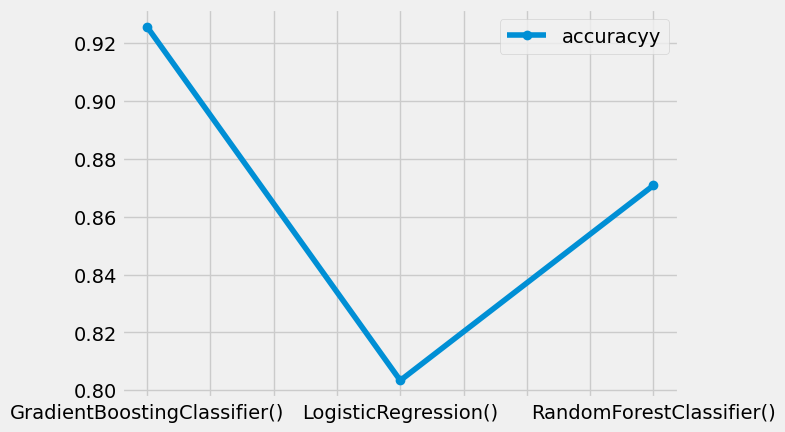

In [32]:
new.plot(marker='o')

In [33]:
# the best Algrothims
modelx=RandomForestClassifier()
modelx.fit(x_train,y_train)


RandomForestClassifier()

In [34]:
pre2=modelx.predict(test)

In [35]:
pre2

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,

In [36]:
final=test.PassengerId

In [37]:
final

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [38]:
newdata=pd.DataFrame({'PassengerId':final,'Survived':pre2})

In [39]:
newdata.to_csv('sub_mmmmission.csv',index=False)

In [40]:
newdata.shape

(418, 2)